# Unsupervised Learning Final Project

For the final project, I found a dataset on Kaggle that included data on countries around the world regarding socioeconomic factors such as child mortality, lifespan, GDP/person, and other factors.  The primary goal of the data analysis is to help a non-profit organization, HELP International, in strategically deploying funds to help countries in need.  The dataset is 167 x 10.

https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

Unsupervised learning is well-suited for this problem because it allows us to explore hidden patterns in the data without predefined labels. By using clustering methods, we can categorize countries into different groups based on similar socioeconomic characteristics, which should provide a valuable exploratory step in understanding how best to allocate resources.

# Data Cleaning and EDA

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import geopandas as gpd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

In [11]:
# Load data
df = pd.read_csv('Country-data.csv')
df_features = pd.read_csv('data-dictionary.csv')

In [12]:
# Check data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
# Description of features
pd.set_option('display.max_colwidth', None)
df_features.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [14]:
# Check object types and potential missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [15]:
# Verify no missing data
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

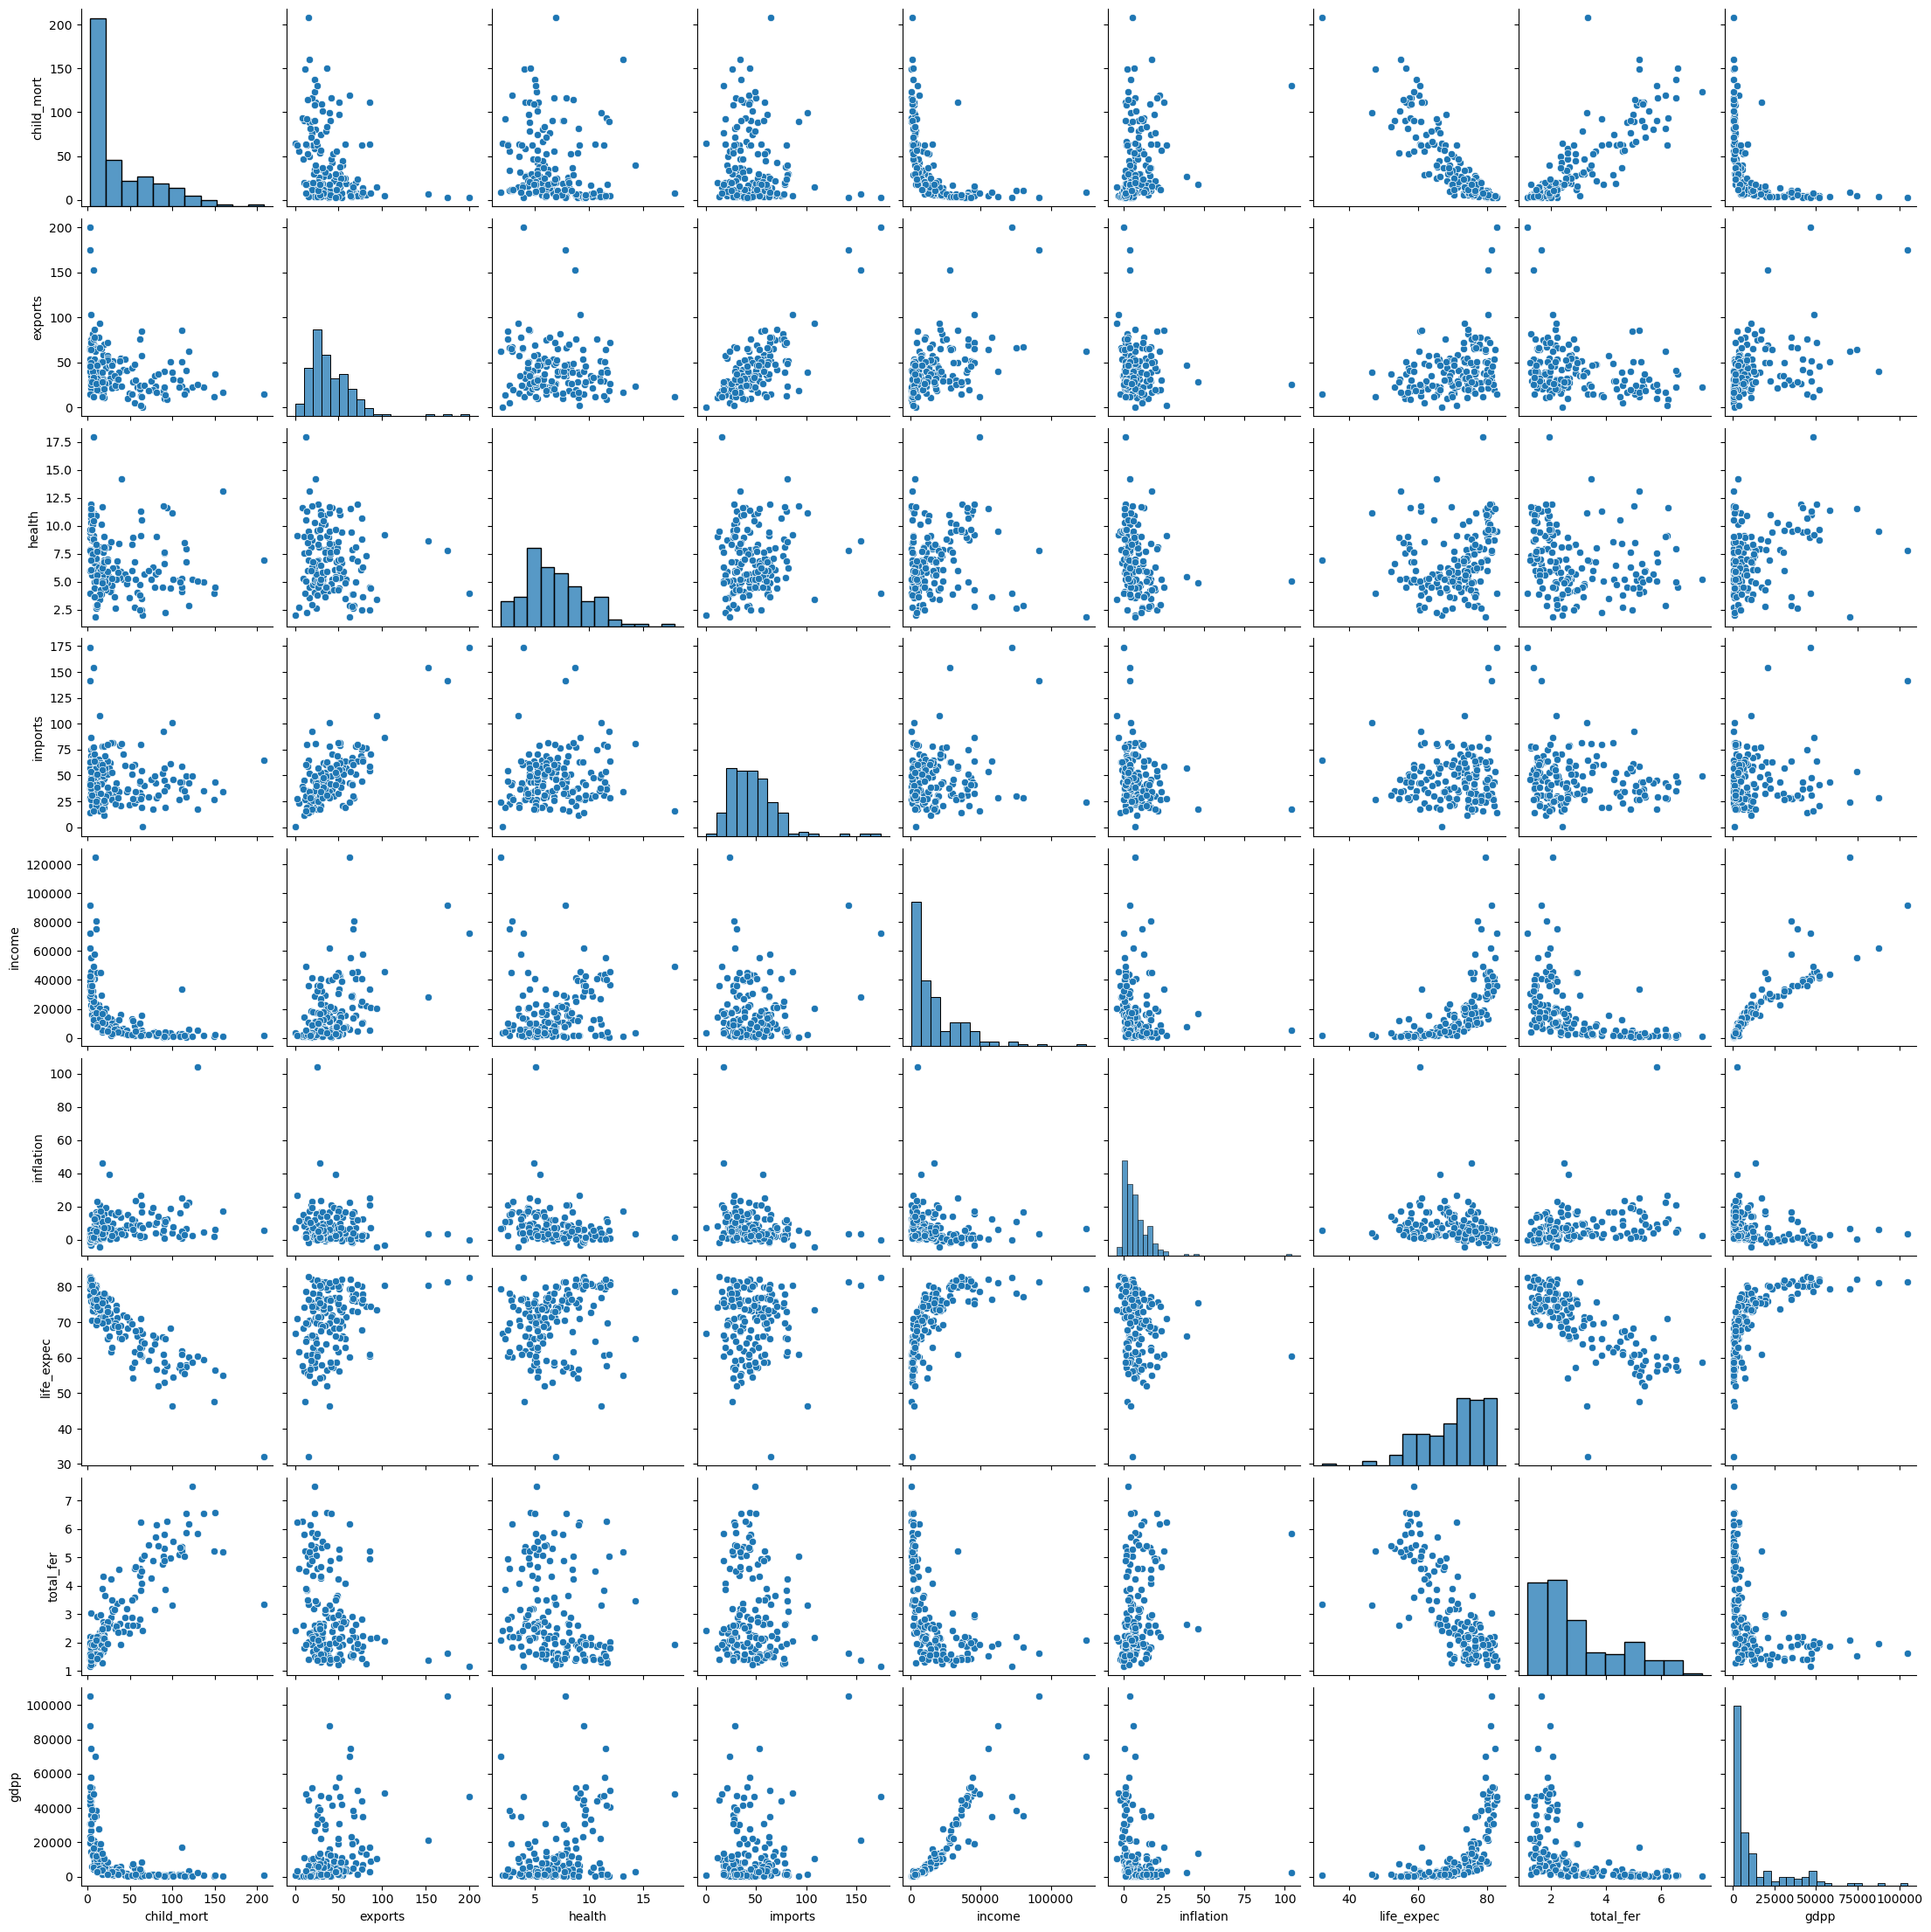

In [16]:
# Pair plot to gain more insight on data and relationships
sns.pairplot(data=df)

The graphs show a lot of relationships one might expect to see, income and gdpp appear to have direct relationships with health factor like life expectancy and child mortality with sharp increases in life expectancy with respect to income and gdpp and sharp decreases in child mortality with increased income.  Based on the sharp change in the curve it seems like modest increases in the financial factors could have signficant impacts in health matters.

Since some of these variables appear to have strong correlations and could impact the clustering results, use of PCA will helpful in reducing dimensionality and retaining the most critical information.

# Modeling

In [17]:
# Set up training data
X = df.drop('country',axis=1)

In [18]:
# Scale training data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [19]:
# Set up function to calculate inertia for elbow plot to help determine ideal clusters
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_X)
    inertia.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

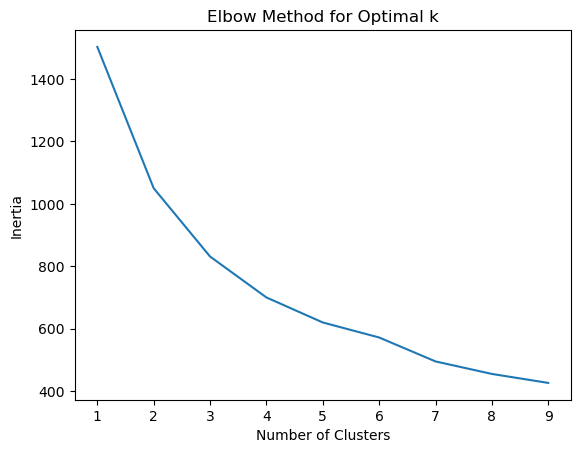

In [20]:
# Plot elbow chart to determine ideal number of clusters
plt.plot(range(1,10),inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Based on the chart it appears that 3 clusters is the ideal number with the slope flattening out after 3.

In [21]:
# Fit model with 3 clusters
model = KMeans(n_clusters=3)
model.fit(scaled_X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

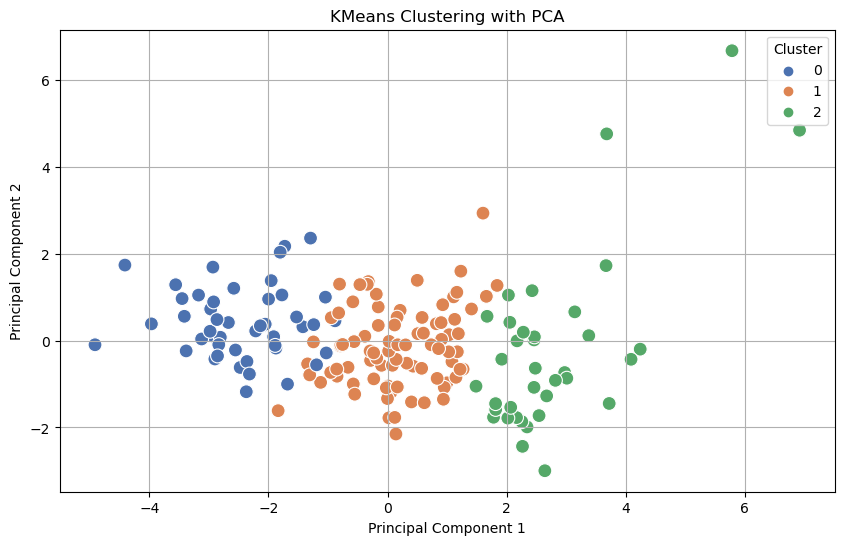

In [22]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_X)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster'] = model.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='deep', s=100)
plt.title('KMeans Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

The clusters appear to have pretty good delineation with some minor overlap but overall look good.  Now, let's try to see what factors are influencing the princal components most.

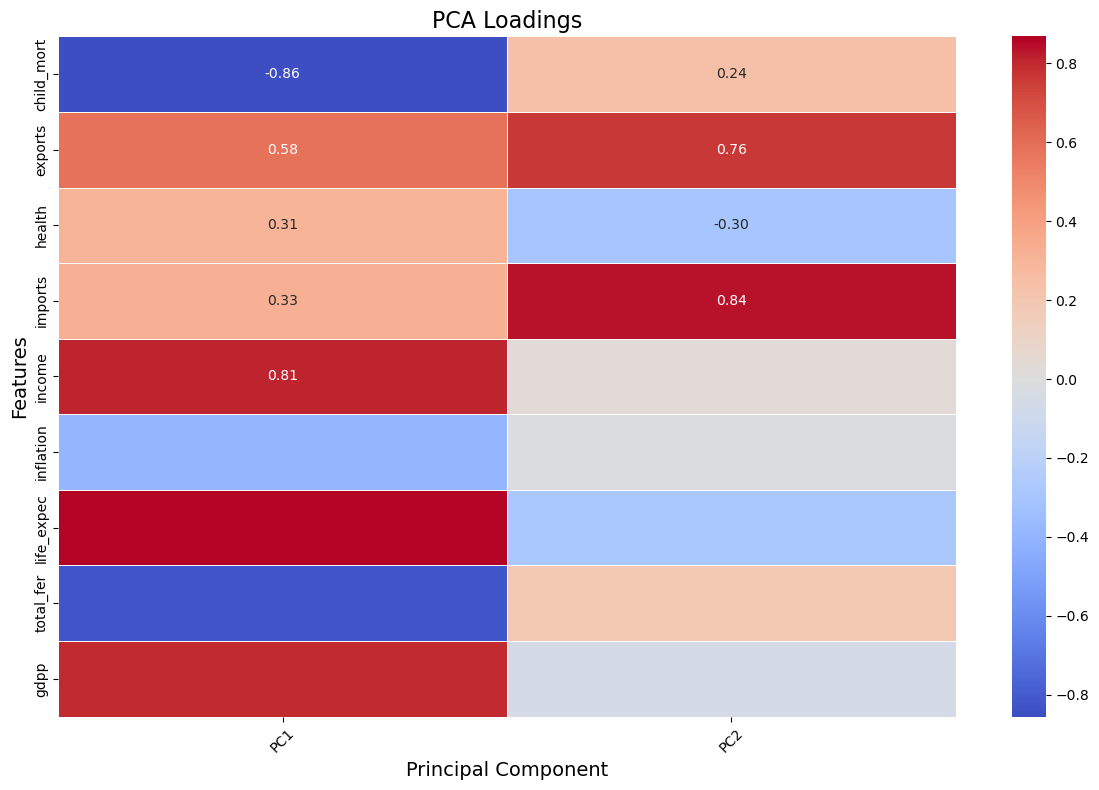

In [23]:
# Check PCA Component loadings
explained_variance = pca.explained_variance_ratio_
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for loadings
loadings_df = pd.DataFrame(loadings, index=X.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Plot PCA Loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)
plt.title('PCA Loadings', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make it look cleaner
plt.show()

The PCA analysis revealed that the first principal component (PC1) accounts for a significant proportion of the variance in the dataset. This component strongly correlates with income, life expectancy, and GDP per capita, indicating that these factors play a dominant role in differentiating the clusters. PC2, while contributing less to the overall variance, helps further separate the clusters by capturing variations related to health and fertility metrics.

To better visualize these clusters, I will try to map them on the world map but first must modify the names from the dataset to match up to the geopandas library.

In [24]:
# Standardize country names and map names to match libraries
df['country'] = df['country'].str.strip().str.lower()

country_mapping_updates = {
    'united states': 'united states of america',
    'western sahara': 'w. sahara',
    'papua new guinea': 'papua new guinea',
    'congo, dem. rep.': 'dem. rep. congo',
    'dominican republic': 'dominican rep.',
    'falkland islands': 'falkland is.',
    'greenland': 'greenland',
    'fr. s. antarctic lands': 'fr. s. antarctic lands',
    'mexico': 'mexico',
    'nicaragua': 'nicaragua',
    'honduras': 'honduras',
    'puerto rico': 'puerto rico',
    'cuba': 'cuba',
    'zimbabwe': 'zimbabwe',
    'côte d\'ivoire': 'ivory coast',  
    'ivory coast': 'côte d\'ivoire',  
    'congo': 'congo, rep.',
    'central african republic': 'central african rep.',
    'equatorial guinea': 'eq. guinea',  
    'eswatini': 'eswatini',
    'palestine': 'palestine',
    'laos': 'laos',
    'korea, north': 'north korea',  
    'kyrgyz republic': 'kyrgyzstan',  
    'syria': 'syria',
    'new caledonia': 'new caledonia',
    'taiwan': 'taiwan',
    'slovakia': 'slovakia',
    'czechia': 'czechia',
    'antarctica': 'antarctica',
    'northern cyprus': 'n. cyprus',
    'ethiopia': 'ethiopia',
    'djibouti': 'djibouti',
    'somaliland': 'somaliland',
    'bosnia and herzegovina': 'bosnia and herz.',
    'macedonia, fyr': 'north macedonia',  
    'kosovo': 'kosovo',
    'trinidad and tobago': 'trinidad and tobago',
    'south sudan': 'south sudan',
}

# Apply the mapping updates
df['country'] = df['country'].replace(country_mapping_updates)
df_pca['country'] = df['country'] 

In [25]:
# Initiate world map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/g7/sptwqp9n0h7d1b0pfkwsyg4h0000gn/T/ipykernel_1075/404320713.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [26]:
# Standardize world map names
world['name'] = world['name'].str.strip().str.lower()

# Merge world data frame with my data frame
merged = world.merge(df_pca[['country', 'Cluster']], left_on='name', right_on='country', how='left')

# Check for NaN values again after re-merging
missing_countries_after_update = merged[merged['Cluster'].isna()]
print("Countries without a cluster after final mapping updates:", missing_countries_after_update[['name', 'country']])



Countries without a cluster after final mapping updates:                        name country
2                 w. sahara     NaN
7          papua new guinea     NaN
12                  somalia     NaN
20             falkland is.     NaN
22                greenland     NaN
23   fr. s. antarctic lands     NaN
27                   mexico     NaN
35                nicaragua     NaN
36                 honduras     NaN
45              puerto rico     NaN
47                     cuba     NaN
48                 zimbabwe     NaN
60            côte d'ivoire     NaN
67                    congo     NaN
73                 eswatini     NaN
79                palestine     NaN
92                     laos     NaN
95              north korea     NaN
108                   syria     NaN
134           new caledonia     NaN
135             solomon is.     NaN
140                  taiwan     NaN
152                slovakia     NaN
153                 czechia     NaN
159              antarctica     NaN
160    

The world dataframe has more countries than my data set so not all countries will show up.

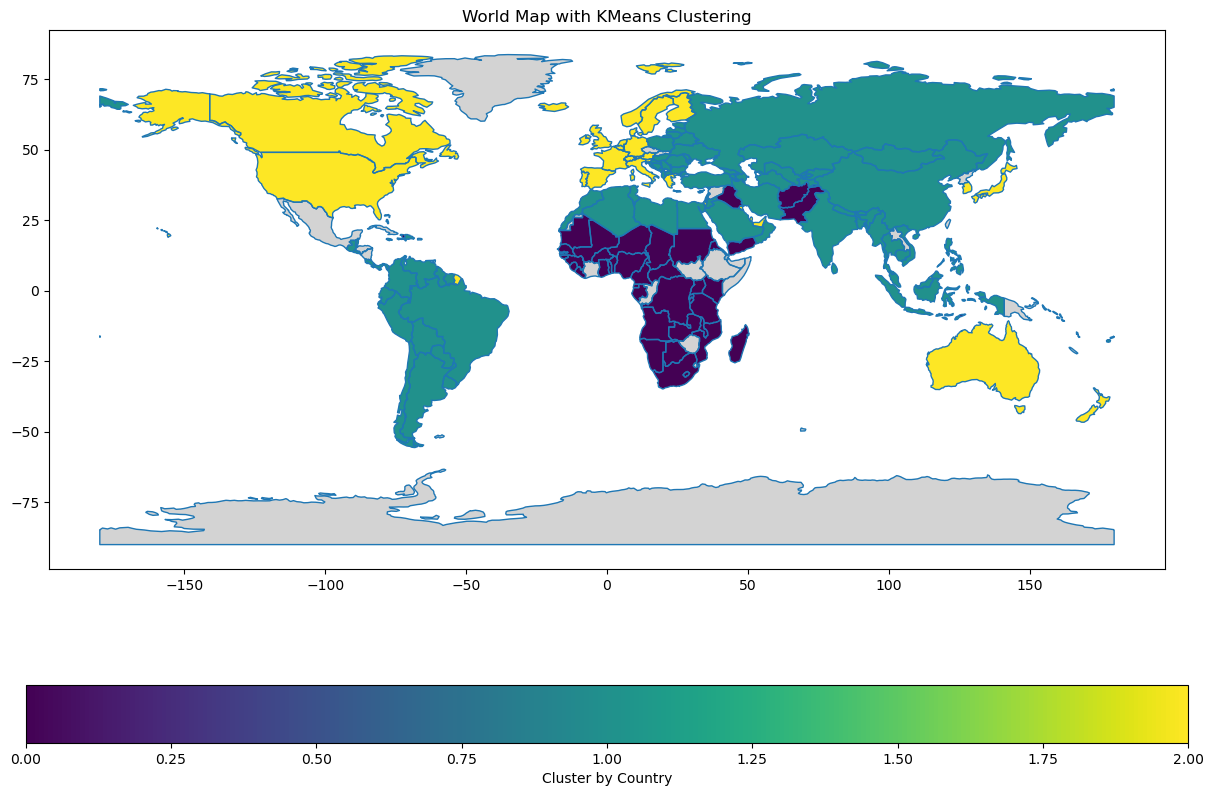

In [27]:
# Plot the clusters
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

merged.boundary.plot(ax=ax, linewidth=1)

merged.plot(column='Cluster', ax=ax, legend=True,
            legend_kwds={'label': "Cluster by Country",
                         'orientation': "horizontal"},
            cmap='viridis', missing_kwds={"color": "lightgrey"})  
plt.title('World Map with KMeans Clustering')
plt.show()

Based on the map it looks like the clusters align with what one might expect, wealthier countries like the United States, Canada, and European countries show up in cluster 2.  Cluster 0 includes countries like China, India, and most of South America.  Then cluster 1 includes most of Africa and a few other countries.  

Now, I'll use heirarchal clustering to see how the results compare.  I will try different linkage methods and distance metrics to determine the best model using the silhoette score.  Then create the model with the results.

In [28]:
# Define the parameter grid
linkage_methods = ['ward', 'complete', 'average', 'single']
distance_metrics = ['euclidean', 'cityblock']  

# Store the best score and parameters
best_score = -1
best_params = None

# Loop through parameter combinations
for linkage_method in linkage_methods:
    # For Ward's method, only use Euclidean metric
    if linkage_method == 'ward':
        distance_metrics = ['euclidean']  

    for distance_metric in distance_metrics:
        # Perform hierarchical clustering
        linked = linkage(scaled_X, method=linkage_method, metric=distance_metric)

        # Cut the dendrogram to form clusters
        clusters = fcluster(linked, t=3, criterion='maxclust')  

        # Calculate the silhouette score
        silhouette_avg = silhouette_score(scaled_X, clusters)

        # Print results
        print(f'Linkage: {linkage_method}, Metric: {distance_metric}, Silhouette Score: {silhouette_avg}')

        # Check if this is the best score
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params = (linkage_method, distance_metric)

# Output the best parameters
print(f'Best Score: {best_score}, Best Parameters: {best_params}')

Linkage: ward, Metric: euclidean, Silhouette Score: 0.24563001303300652
Linkage: complete, Metric: euclidean, Silhouette Score: 0.29005247526122313
Linkage: average, Metric: euclidean, Silhouette Score: 0.5620472870560562
Linkage: single, Metric: euclidean, Silhouette Score: 0.5689127494518488
Best Score: 0.5689127494518488, Best Parameters: ('single', 'euclidean')


Based on the results, he silhouette scores varied signficantly with different linkage methods, which highlights the importance of selecting the appropriate type.  The best performance was achieved using single linkage with Euclidean distance, which maximizes the silhouette score by grouping countries with the closest data points. 

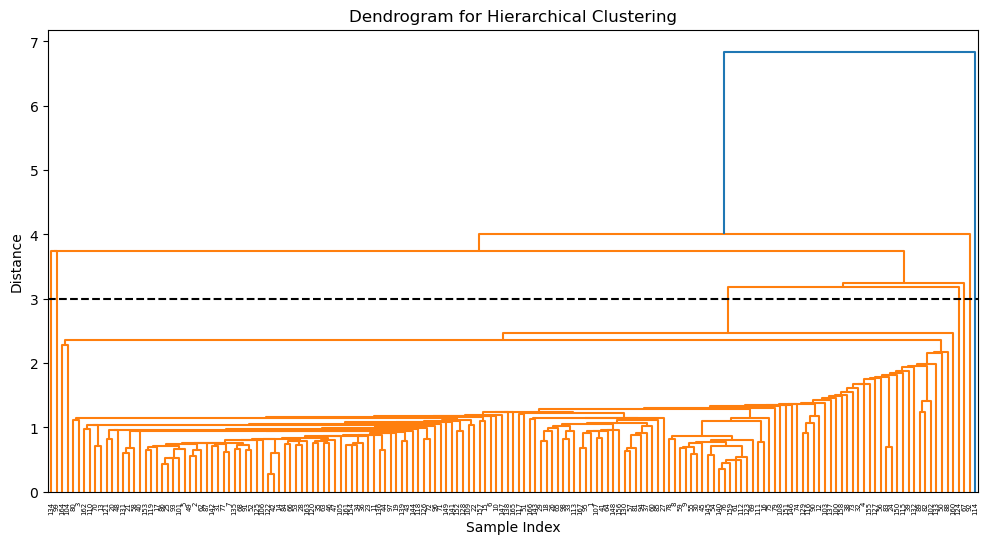

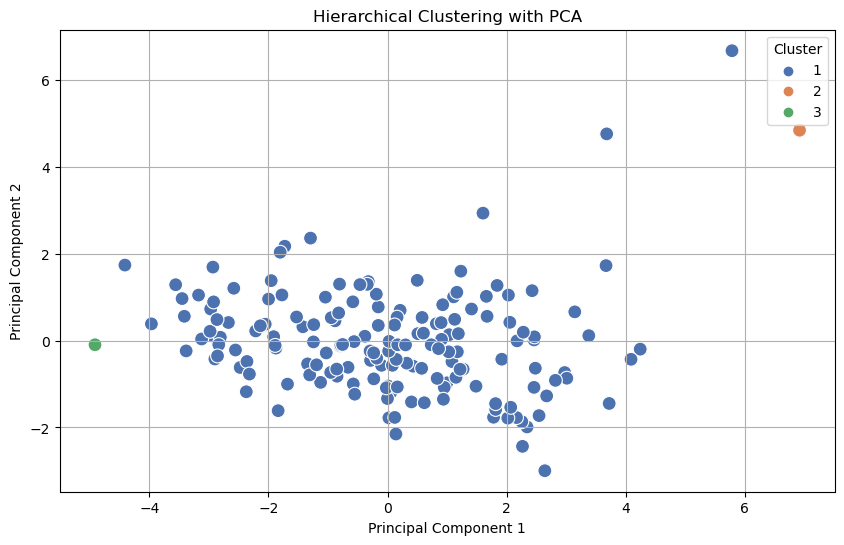

In [39]:
linked = linkage(scaled_X, method='single',metric='euclidean')  
# Create a dendrogram 
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=np.arange(1, len(scaled_X) + 1), distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=3, color='black', linestyle='--')  
plt.show()

# Decide the number of clusters based on the dendrogram and cut it
n_clusters_hierarchical = 3 
df_pca['Hierarchical_Cluster'] = fcluster(linked, n_clusters_hierarchical, criterion='maxclust')

# Visualize the clusters from hierarchical clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=df_pca, palette='deep', s=100)
plt.title('Hierarchical Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Using 3 clusters, heirarchal clustering did not perform nearly as well as K-Means with most countries being clustered into cluster 1.

K-means clustering was able to create 3 distinct clusters with results that align with what one might expect. Hierarchical clustering, on the other hand, resulted in a large cluster containing most data points, indicating that it struggled to delineate the country groups as effectively as K-means. 

One reason for the poorer performance of hierarchical clustering could be its sensitivity to noise and outliers in the data, which can significantly affect the clustering structure when using methods like single linkage. This contrasts with K-means, which is generally more robust to such issues, especially after scaling the data.

# Conclusions

In order to see the countries in the greatest need, I will look at the countries with PC1 below -3 as these would represent the countries most in need.  From there we can sort the list and see which countries would benefit the most from additional resources.

In [43]:
# Filter and sort countries where PC1 is below -3
countries_below_threshold = df_pca[df_pca['PC1'] < -3].sort_values(by='PC1')

# Display the countries
print(countries_below_threshold[['country', 'PC1', 'PC2', 'Cluster']])

                  country       PC1       PC2  Cluster
113               nigeria -4.912066 -0.094499        0
66                  haiti -4.409717  1.742230        0
31   central african rep. -3.964964  0.386619        0
32                   chad -3.557555  1.289128        0
112                 niger -3.450168  0.969922        0
97                   mali -3.412255  0.561469        0
132          sierra leone -3.381625 -0.236302        0
37        dem. rep. congo -3.173370  1.050382        0
25           burkina faso -3.122053  0.038775        0


Based on the final analysis, it appears that the countries with the greatest need include Nigeria, Haiti, and Central African Rep.  These are the top countries that HELP International should focus on with it's available resources that would drive the greatest impact.

One limitation of the current analysis is the assumption that all features contribute equally to the clustering process after standardization. In reality, some features like GDP or life expectancy might have a more substantial impact on a country’s overall socioeconomic status than others, such as fertility rate.  Future analysis might include using different weighting schemes and dimensionality reduction techniques that may better account for this.